In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./gm2nearline_hists_run30644.root")
t = f.Get("nearlineHistTree/eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :     2305 : Total =         5412038 bytes  File  Size =    3880125 *
*        :          : Tree compression factor =   1.39                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :     2305 : Total  Size=       9865 bytes  File Size  =        264 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  35.52     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :     2305 : Total  Size=       9883 bytes  File Size  =        319 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  29.41     *
*...................................................

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available
Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSBeamProfileArtRecord is available


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


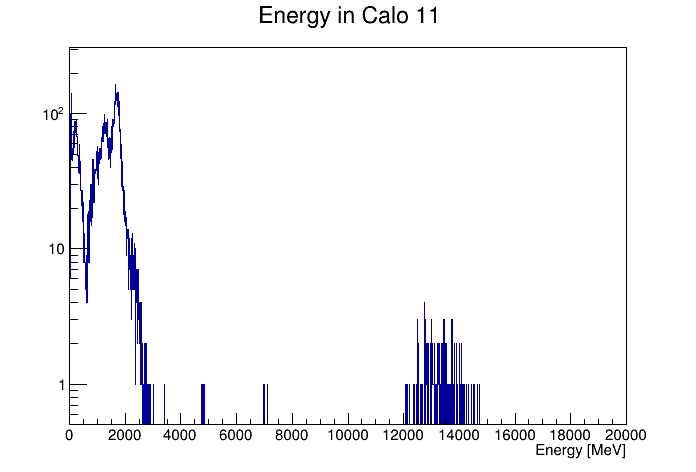

In [9]:
c = r.TCanvas()
h = r.TH1D("h","Energy in Calo 11; Energy [MeV]",2000,0,20000)
t.Draw("energy>>h","caloNum == 11")
c.SetLogy()
c.Draw()

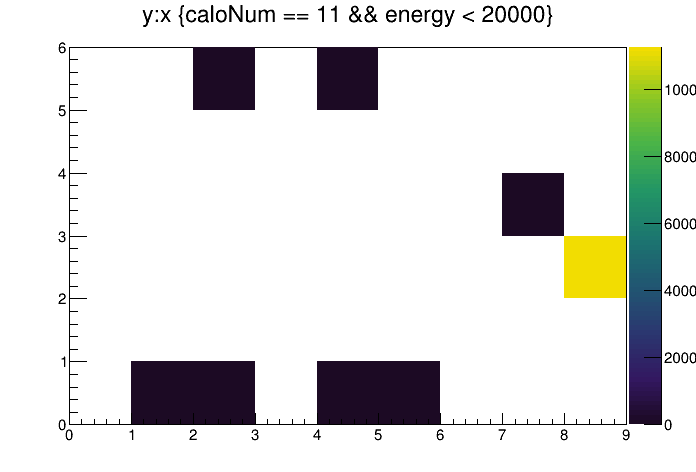

In [11]:
c = r.TCanvas()
t.Draw("y:x>>hist(9,0,9,6,0,6)","caloNum == 11 && energy < 20000","colz")
c.Draw()

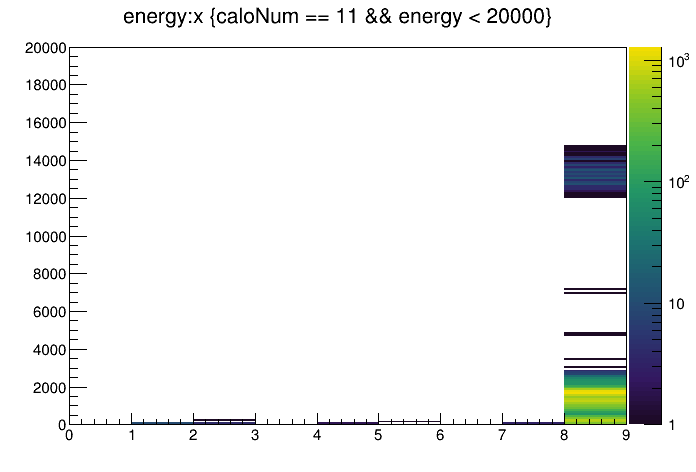

In [15]:
c = r.TCanvas()
t.Draw("energy:x>>hist(9,0,9,200,0,20000)","caloNum == 11 && energy < 20000","colz")
#c.SetLogy()
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


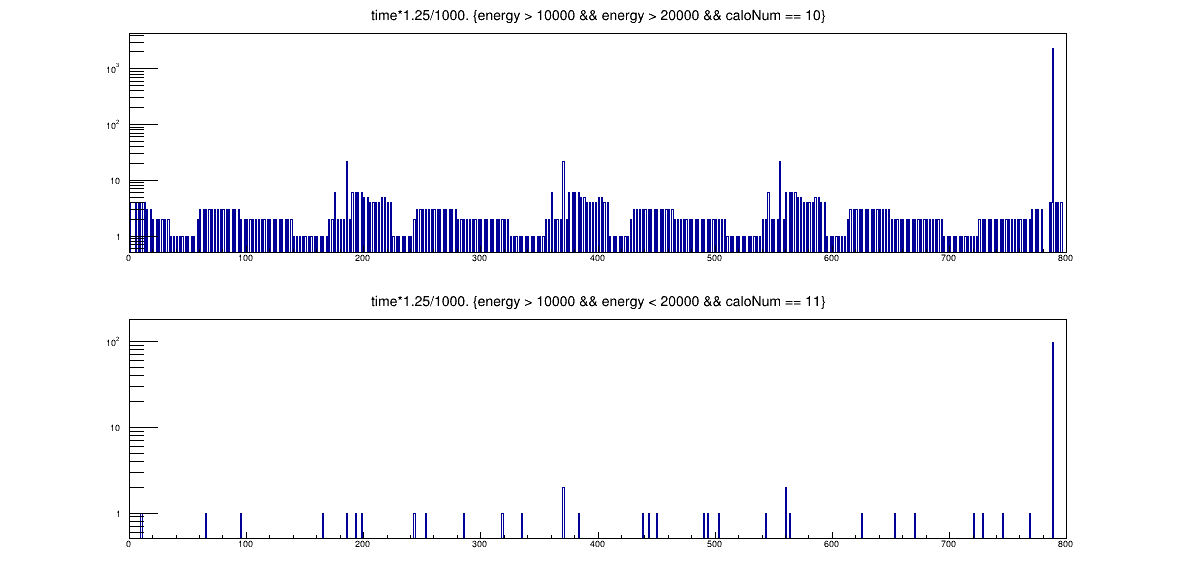

In [28]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)
c.cd(1)
t.Draw("time*1.25/1000.>>hist(800,0,800)","energy > 10000 && energy > 20000 && caloNum == 10","")
r.gPad.SetLogy()
c.cd(2)
t.Draw("time*1.25/1000.>>his2t(800,0,800)","energy > 10000 && energy < 20000 && caloNum == 11","")
r.gPad.SetLogy()
c.Draw()

In [29]:
t.Scan("runNum:subRunNum:eventNum","caloNum == 11 && energy > 10000 && energy < 20000")

128

***********************************************************
*    Row   * Instance *    runNum * subRunNum *  eventNum *
***********************************************************
*       93 *       23 *     30644 *         0 *       223 *
*      102 *       26 *     30644 *         0 *       243 *
*      104 *       25 *     30644 *         0 *       247 *
*      124 *       23 *     30644 *         0 *       289 *
*      166 *       77 *     30644 *         1 *        46 *
*      168 *       65 *     30644 *         1 *        50 *
*      169 *       72 *     30644 *         1 *        52 *
*      169 *       79 *     30644 *         1 *        52 *
*      181 *       24 *     30644 *         1 *        78 *
*      198 *       23 *     30644 *         1 *       114 *
*      200 *       23 *     30644 *         1 *       118 *
*      202 *       24 *     30644 *         1 *       122 *
*      203 *       24 *     30644 *         1 *       124 *
*      215 *       23 *     30644 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

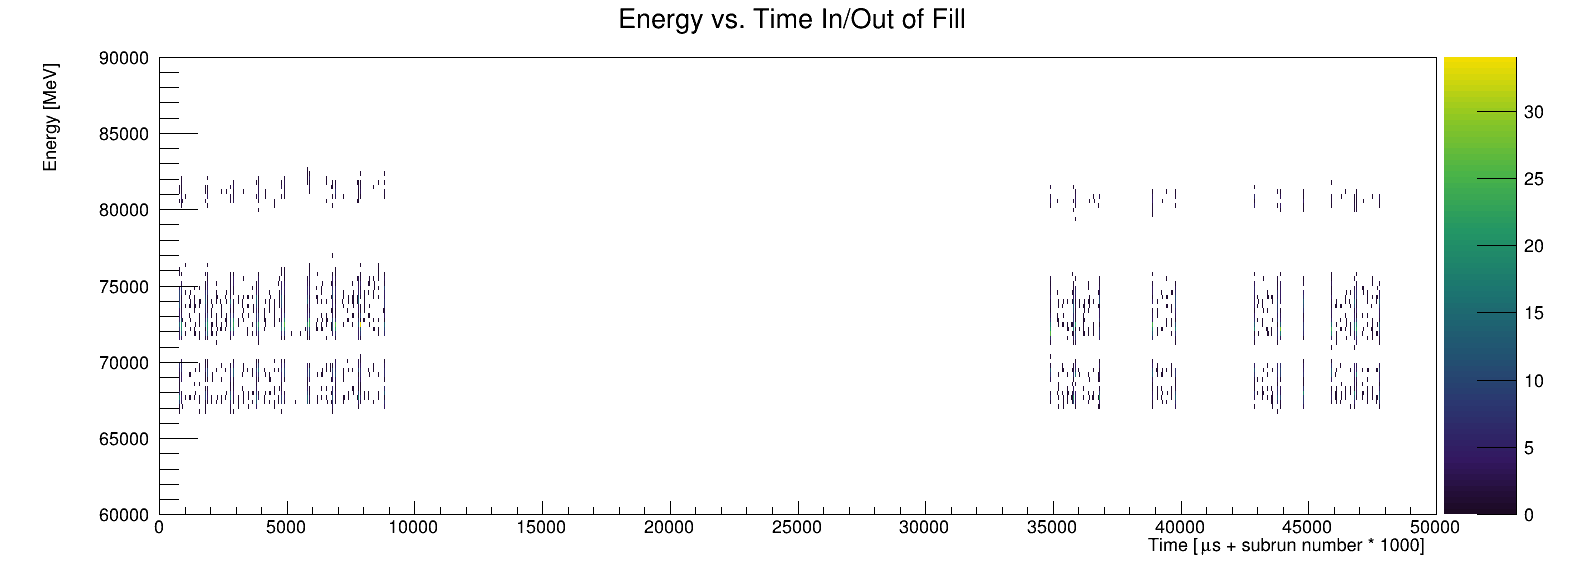

In [3]:
c = r.TCanvas("c","c",1600,600)
h = r.TH2I("h","Energy vs. Time In/Out of Fill; Time [#mus + subrun number * 1000]; Energy [MeV]",
          500000,0,50000,
          100,60000,90000)
t.Draw("energy:subRunNum*1000+time*1.25/1000>>h","caloNum == 11 && energy > 20000","colz")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


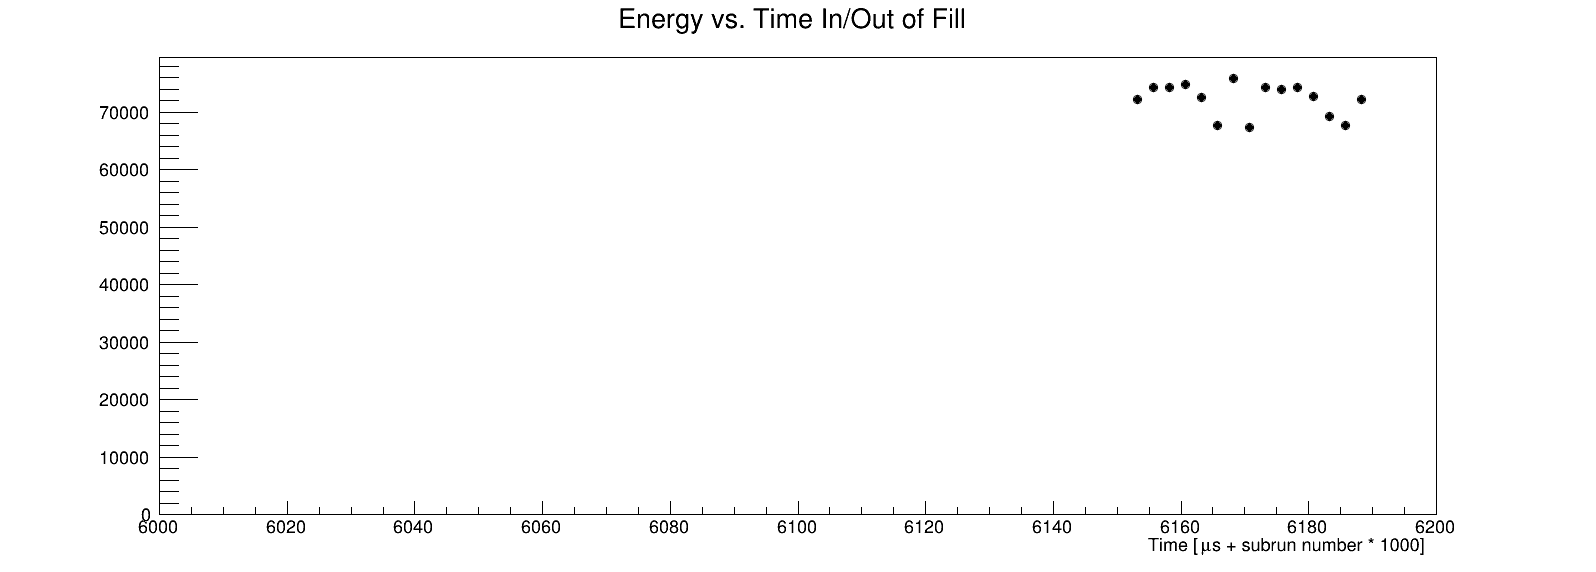

In [4]:
c = r.TCanvas("c","c",1600,600)
hx  = h.ProfileX().Clone("hx")
hx.SetMarkerStyle(8)
hx.SetMarkerSize(1)
hx.Draw("pe")
#hx.GetYaxis().SetRangeUser(52000,80000)
hx.GetXaxis().SetRangeUser(6000,6200)
c.Draw()

In [5]:
gr = r.TGraphErrors()
point = 0
for i in range(hx.GetNbinsX()):
    if(hx.GetBinContent(i) > 0):
        gr.SetPoint(point, hx.GetBinCenter(i), hx.GetBinContent(i))
        gr.SetPointError(point, 0, hx.GetBinError(i))
        point += 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ding_11.root has been created


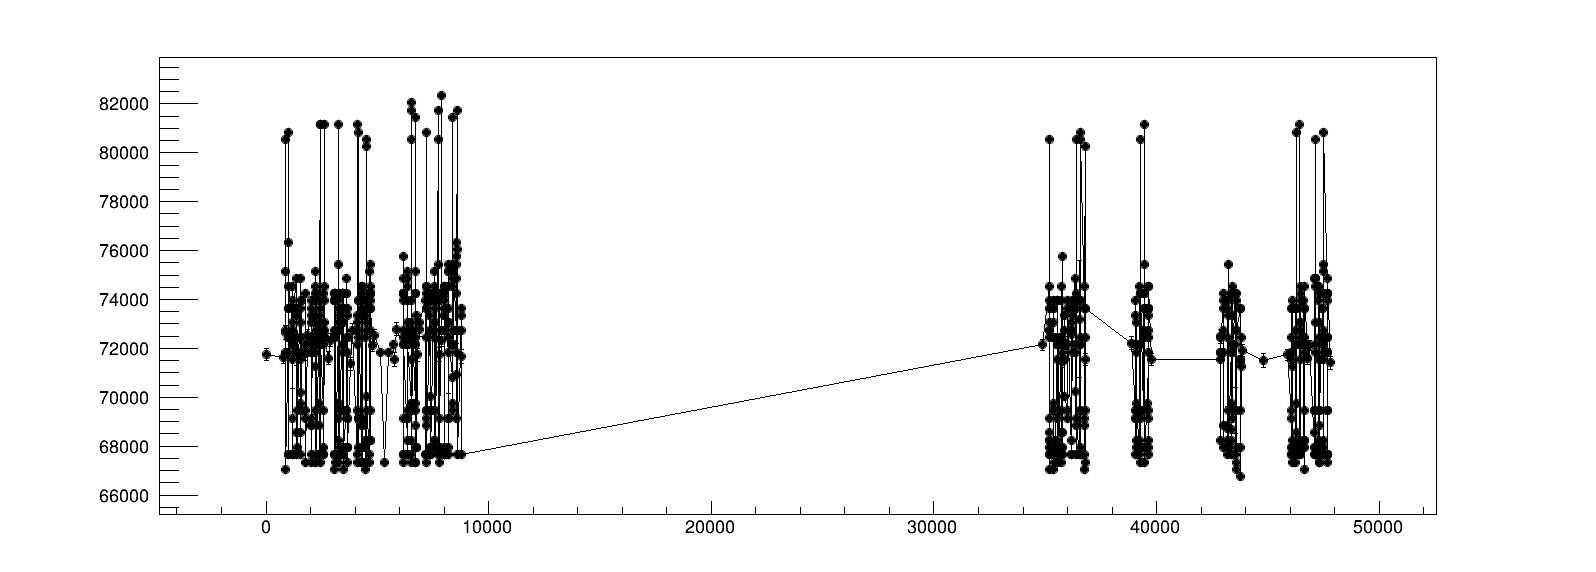

In [6]:
c = r.TCanvas("c","c",1600,600)
gr.SetMarkerStyle(8)
gr.SetMarkerSize(1)
gr.Draw("apl")
#gr.GetYaxis().SetRangeUser(52000,80000)
#gr.GetXaxis().SetRangeUser(6000,6200)
c.Draw()
c.Print("ding_11.root")